# Project 1

## Step 1: Run pseudoexperiments for 10000 events

- the pdf is: $$p(t;\tau, \Delta m, V) \propto (1 + V\sin{\Delta m t}) e^{-\frac{t}{\tau}}$$
- nominal values are: $$\tau = 1.5\times 10^{-6}\ \text{s} $$ $$\Delta m = 20\times 10^{6}\ \text{s} $$ $$V = 0.1$$

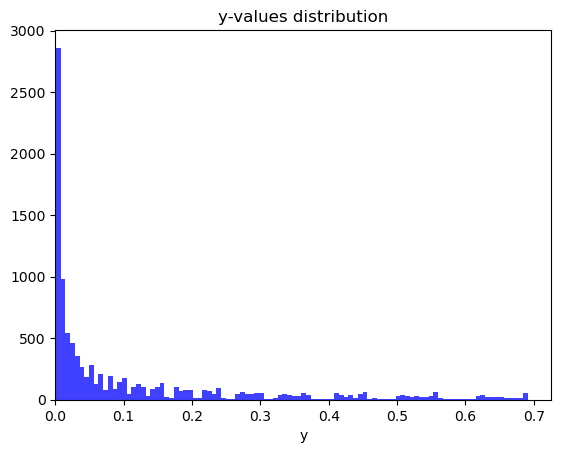

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit.cost import UnbinnedNLL
from scipy.stats import norm


# define pdf (not normalised?)
def pdf(t, tau, dm, V):
    return (1 + V*np.sin(dm*t))*np.exp(-t/tau)


# nominal parameter values
tau_nom = 1.5e-6
dm_nom = 20e6
V_nom = 0.1 # takes 0 if universe non-symmetric


# generate data
bounds = [5e-7, 1e-5] # range of t values in which to generate data

#t = np.linspace(bounds[0], bounds[1], 10000) # generate decay times t within bounds
t = np.random.uniform(bounds[0], bounds[1], size=10000) # uniform distribution maybe more correct?
y = pdf(t, tau_nom, dm_nom, V_nom) # input t-values into pdf


# plot data
plt.hist(y, bins=100, color="blue", alpha = 0.75) # plot histogram of pdf
#plt.hist(t, bins=100)

plt.xlim(0,)
plt.xlabel("y")
plt.title("y-values distribution")
plt.show()



# Normalise the given pdf using scipy.integrate
- specify function, bounds and function arguments
- returns result and integration error as a tuple

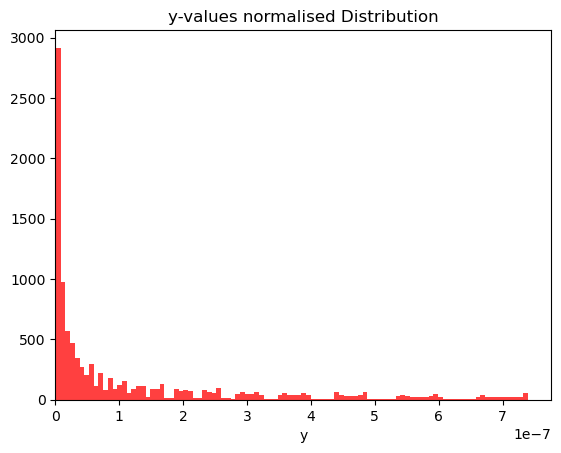

In [ ]:
import scipy.integrate as integrate


# integrate the pdf over the bounds to find normalisation constant
result = integrate.quad(pdf, bounds[0], bounds[1], args=(tau_nom, dm_nom, V_nom))
norm = result[0]


# obtain y-values using this new normalised pdf
y_norm = norm*pdf(t, tau_nom, dm_nom, V_nom)


# plot data
plt.hist(y_norm, bins=100, color="red", alpha = 0.75) # if density=True here, will that be the same as normalising the pdf before? TRY!!

plt.xlim(0,)
plt.xlabel("y")
plt.title("y-values normalised Distribution")
plt.show()


# Fit a curve to this distribution
- using iminuit

In [29]:
from iminuit import Minuit # for the minimising
from iminuit.cost import UnbinnedNLL # for obtaining the NLL when we have unbinned data


# use iminuit to fit 
NLL = UnbinnedNLL(y_norm, pdf) # the NLL
m = Minuit(NLL, tau=tau_nom, dm=dm_nom, V=V_nom)

m.migrad()  # find minimum
m.hesse()   # compute uncertainties

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1879                      │              Nfcn = 417              │
│ EDM = 4.15e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ tau  │    2.2    │    2.0    │            │            │         │         │       │
│ 1 │ dm   │27.5310365e6│0.0000020e6│            │            │         │         │       │
│ 2 │ V    │   0.683   │   0.013   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬────────────────────────────┐
│     │      tau       dm        V │
├─────┼────────────────────────────┤
│ tau │        4        0       -0 │
│  dm │        0        4       -0 │
│   V │       -0       -0 0.000158 │
└─────┴────────────────────────────┘

In [ ]:
y_model = pdf(t, m.values["tau"], m.values["dm"], m.values["V"])


# plot the data and the fitted curve
plt.hist(y_norm, bins=100, color="red", alpha = 0.75, label="data") 
plt.plot(t, y_model, color="blue", label="fit")

plt.xlim(0,)
plt.xlabel("Data Values")
plt.title("Dataset Fit")
plt.legend()
plt.show()
